<a href="https://colab.research.google.com/github/ras1364/Run10SentenceBert/blob/main/SentenceBertLSTM7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this code, the sentences individually + Sentence-BERT encoder +  AveragePooling  + LSTM network **

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving X_test7.csv to X_test7.csv
Saving X_train7.csv to X_train7.csv
Saving y_test7.csv to y_test7.csv
Saving y_train7.csv to y_train7.csv


In [3]:
num = "7"
X_test = pd.read_csv("/content/X_test"+num+".csv")
X_train = pd.read_csv("/content/X_train"+num+".csv")
y_test = pd.read_csv("/content/y_test"+num+".csv")
y_train = pd.read_csv("/content/y_train"+num+".csv")

In [4]:
max_length = 100
# for x in range(0,len(X_train)):
#   line = X_train.loc[x].at["text"]
#   if max_length < len(line.split()) :
#     max_length = len(line.split())

print(max_length)


100


In [5]:
from gensim.parsing.preprocessing import remove_stopwords

def preprocess(text):
  return remove_stopwords(text)

X_train["stemmed_text_data"] = X_train["text"].map(preprocess)
X_test["stemmed_text_data"] = X_test["text"].map(preprocess)

In [6]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=e9cfdf60b8f1194775278ba73ca89915b42b296cad8c5b4e09899bc99887911a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [7]:
def percent_complete(step, total_steps, bar_width=60, title="", print_perc=True):
    import sys

    # UTF-8 left blocks: 1, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8
    utf_8s = ["█", "▏", "▎", "▍", "▌", "▋", "▊", "█"]
    perc = 100 * float(step) / float(total_steps)
    max_ticks = bar_width * 8
    num_ticks = int(round(perc / 100 * max_ticks))
    full_ticks = num_ticks / 8      # Number of full blocks
    part_ticks = num_ticks % 8      # Size of partial block (array index)

    disp = bar = ""                 # Blank out variables
    bar += utf_8s[0] * int(full_ticks)  # Add full blocks into Progress Bar

    # If part_ticks is zero, then no partial block, else append part char
    if part_ticks > 0:
        bar += utf_8s[part_ticks]

    # Pad Progress Bar with fill character
    bar += "▒" * int((max_ticks/8 - float(num_ticks)/8.0))

    if len(title) > 0:
        disp = title + ": "         # Optional title to progress display

    # Print progress bar in green: https://stackoverflow.com/a/21786287/6929343
    disp += "\x1b[0;32m"            # Color Green
    disp += bar                     # Progress bar to progress display
    disp += "\x1b[0m"               # Color Reset
    if print_perc:
        # If requested, append percentage complete to progress display
        if perc > 100.0:
            perc = 100.0            # Fix "100.04 %" rounding error
        disp += " {:6.2f}".format(perc) + " %"

    # Output to terminal repetitively over the same line using '\r'.
    sys.stdout.write("\r" + disp)
    sys.stdout.flush()

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import tensorflow as tf

def encode(text, maxlen,maxSentence,mtitle):
  embeddings=[]
  counter = 1
  for row in text:
    embedding =[]
    counter+=1
    sentecesCoutner = 0
    percent_complete(counter, len(text), title=mtitle)
    for sent in sent_tokenize(row):
      sentecesCoutner+=1
      if(sentecesCoutner<maxSentence):
        embedding.append(sbert_model.encode(sentences=sent ,convert_to_numpy=True ))

    loop = maxSentence - len(embedding)
    for x in range(loop):
      embedding.append(np.zeros([384],dtype=float))
    embeddings.append(embedding)

  return embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
import time

In [10]:
max_sentence = 50
startedTime = time.time()
X_train_encoded = encode(X_train.stemmed_text_data,max_length,max_sentence,"X_train_embedding")
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

X_train_embedding: ████████████████████████████████████████████████████████████ 100.00 %
Elapsed Time :  297.9428358078003 sec or  4.965713930130005 min


In [11]:
startedTime = time.time()
X_test_encoded = encode(X_test.stemmed_text_data,max_length,max_sentence,"X_test_embedding")
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

X_test_embedding: ████████████████████████████████████████████████████████████▎ 100.00 %
Elapsed Time :  69.07985258102417 sec or  1.1513308763504029 min


In [12]:
X_train_embedding_squeezed = np.squeeze(X_train_encoded)
X_test_embedding_squeezed = np.squeeze(X_test_encoded)

In [13]:
print("X_train.shape = " , np.shape(X_train_embedding_squeezed), " y_train.shape = ", y_train["deceptive"].shape)
print("X_test.shape = " , np.shape(X_test_embedding_squeezed), " y_test.shape = ", y_test["deceptive"].shape)

X_train.shape =  (1280, 50, 384)  y_train.shape =  (1280,)
X_test.shape =  (320, 50, 384)  y_test.shape =  (320,)


In [14]:

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(1280, input_shape=(50,384)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1280)              8524800   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,608,897
Trainable params: 8,608,897
Non-trainable params: 0
_________________________________________________________________


In [16]:
startedTime = time.time()
model.fit(X_train_embedding_squeezed,y_train.deceptive, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 132s 6s/step - loss: 0.6932 - accuracy: 0.4930
Epoch 2/50
20/20 [==============================] - 131s 7s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 130s 7s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 129s 6s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 130s 6s/step - loss: 0.6929 - accuracy: 0.5156
Epoch 6/50
20/20 [==============================] - 125s 6s/step - loss: 0.6902 - accuracy: 0.5086
Epoch 7/50
20/20 [==============================] - 131s 7s/step - loss: 0.6271 - accuracy: 0.6859
Epoch 8/50
20/20 [==============================] - 127s 6s/step - loss: 0.4753 - accuracy: 0.7773
Epoch 9/50
20/20 [==============================] - 127s 6s/step - loss: 0.4058 - accuracy: 0.8180
Epoch 10/50
20/20 [==============================] - 129s 6s/step - loss: 0.3524 - accuracy: 0.8484
Epoch 11/

In [17]:
model.evaluate(X_test_embedding_squeezed, y_test.deceptive)

10/10 [==============================] - 11s 1s/step - loss: 0.8381 - accuracy: 0.8000


[0.8380956649780273, 0.800000011920929]

In [18]:
y_predicted = model.predict(X_test_embedding_squeezed)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 11s 1s/step


In [19]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[129,  31],
       [ 33, 127]])

Text(50.722222222222214, 0.5, 'Truth')

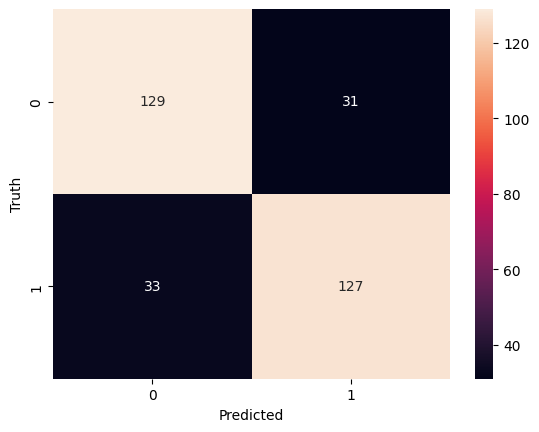

In [21]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       160
           1       0.80      0.79      0.80       160

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

